In [339]:
# importing required libraries and settings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_colwidth', None)

In [340]:
# Reading in data
df = pd.read_csv("crimeall.csv", sep = ',')
# Below removed series are sourced from the Official Designations from the City of Pittsburgh
df = df[df['INCIDENTNEIGHBORHOOD'] != 'Outside County'] # This is not a Pittsburgh Neighborhood
df = df[df['INCIDENTNEIGHBORHOOD'] != 'Outside State']  # This is not a Pittsburgh Neighborhood
df = df[df['INCIDENTNEIGHBORHOOD'] != 'Mt. Oliver Boro']  # This is not a Pittsburgh Neighborhood  ***Mt. Oliver is a Pittsburgh neighborhood, but Mt. Oliver Boro is not.***

# print(df.info)

In [341]:
# Data comprises police reports in the Pittsburgh Area from 2015 to the present
# Only Pitt police, no campus police or port authority
print(len(df['INCIDENTNEIGHBORHOOD'].unique()))     # check how many neighborhoods there are
df_sub = df.INCIDENTNEIGHBORHOOD.value_counts()     # stores count of each unique value
df_reverse = df_sub.iloc[::-1]                      # reversing data frame to show from lowest value....a better way might exist
df_reverse10 = df_reverse.iloc[:10]                 # show only first 10 neighborhoods


96


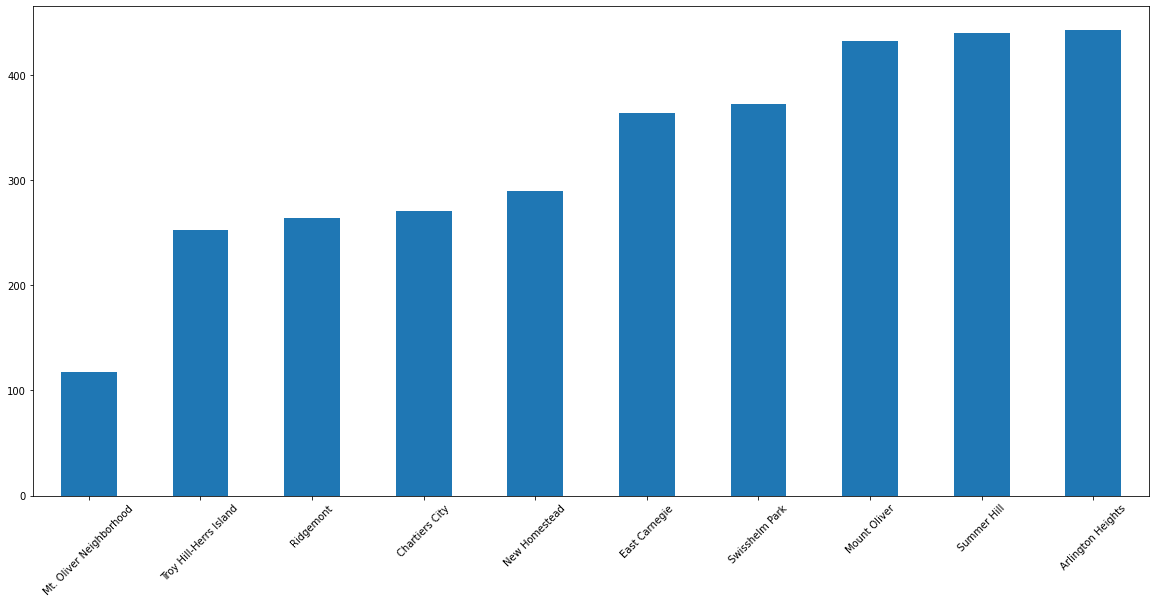

In [342]:
plt.rcParams["figure.figsize"] = [20,9]     # setting graph size or else it's too small
df_reverse10.plot.bar()                     # graphing our dataframe
plt.xticks(rotation=45)                     # rorate x-axis for readability
plt.show()                                  # show graph more cleanly

# hills island is part of troy hills neighborhood

In [343]:
df.INCIDENTNEIGHBORHOOD.value_counts()

South Side Flats             15904
Central Business District    14604
Carrick                       9766
Bloomfield                    7411
Shadyside                     7136
                             ...  
New Homestead                  290
Chartiers City                 271
Ridgemont                      264
Troy Hill-Herrs Island         252
Mt. Oliver Neighborhood        117
Name: INCIDENTNEIGHBORHOOD, Length: 95, dtype: int64

In [344]:
# Test
import pandas as pd
import geopandas
%matplotlib inline
# import dataset
steps = pd.read_csv("steps.csv")
# filter to important info
num_steps = steps.groupby("neighborhood").sum()['number_of_steps']
num_steps.sort_values(ascending=False)


neighborhood
South Side Slopes        4075.0
Beechview                2473.0
Perry South              1843.0
Greenfield               1472.0
Hazelwood                1374.0
                          ...  
Esplen                     48.0
Windgap                    16.0
Mount Oliver Borough        9.0
Central Lawrenceville       9.0
Allegheny Center            0.0
Name: number_of_steps, Length: 71, dtype: float64

<AxesSubplot:>

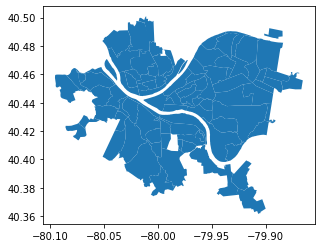

In [345]:
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp") # read in the shapefile
neighborhoods.plot() # plot the geopandas dataframe

<AxesSubplot:>

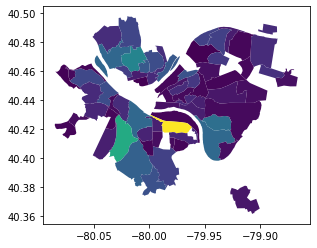

In [346]:
# do the merge
steps_map = neighborhoods.merge(num_steps, how='left', left_on='hood', right_on='neighborhood')
# look at the head to confirm it merged correctly
# steps_map[['hood','number_of_steps','geometry']].head()
# draw a choropleth map using data from the column named "number_of_steps"
steps_map.plot(column='number_of_steps')

<AxesSubplot:>

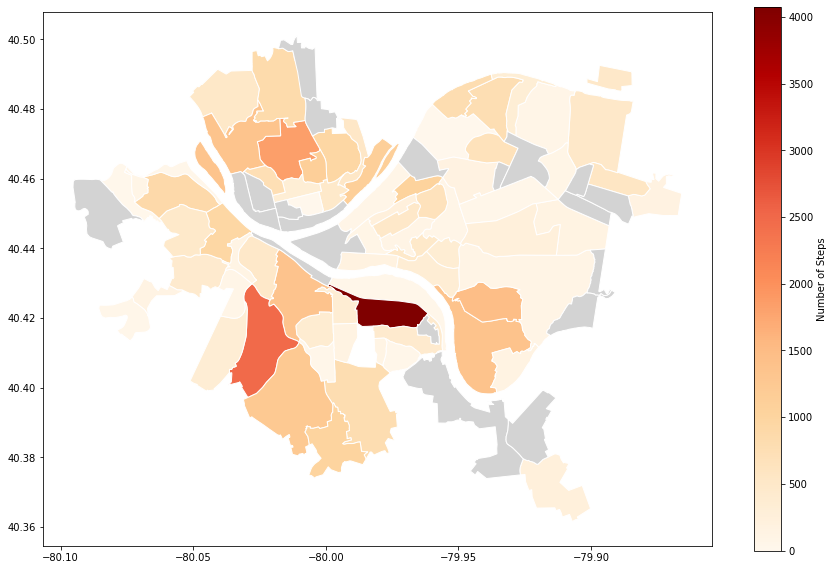

In [347]:
steps_map.plot(column='number_of_steps', # set the data to be used for coloring
               cmap='OrRd',              # choose a color palette
               edgecolor="white",        # outline the districts in white
               legend=True,              # show the legend
               legend_kwds={'label': "Number of Steps"}, # label the legend
               figsize=(15, 10),         # set the size
               missing_kwds={"color": "lightgrey"} # set disctricts with no data to gray
               )

In [348]:
steps.neighborhood.value_counts()

South Side Slopes       98
Mount Washington        46
Beechview               40
Brookline               35
Carrick                 33
                        ..
Strip District           1
South Side Flats         1
Chartiers City           1
Bluff                    1
Mount Oliver Borough     1
Name: neighborhood, Length: 71, dtype: int64

In [349]:
# steps.loc[steps['neighborhood'] == 'Outside County']
df_filtered = df[df['INCIDENTNEIGHBORHOOD'] != 'Outside County']

